# Import design libraries

In [1]:
import sys
sys.path.append('..')

In [2]:
import gdspy
import numpy as np
from importlib import reload
from copy import deepcopy
from QCreator import elements
from QCreator import general_sample_creator as creator
from QCreator import meshing

# Specify constants, everything in microns

In [3]:
tl_core = 10
tl_gap = 10
tl_ground = 20

# Sample generation

## borders with pads

In [4]:
reload(gdspy)
layers_configuration={
    'total':0,
    'restricted area':10,
    'for removing':100,
    'JJs':1,
    'flux lines':6,
    'air bridges':2,
    'air bridge pads':3,
    'vertical gridlines':15,
    'horizontal gridlines':16
}
sample = creator.Sample('4_qubits',layers_configuration)

#specify sample vertical and horizontal lengths
sample.chip_geometry.sample_vertical_size=4.7e3
sample.chip_geometry.sample_horizontal_size=4.7e3
chip_edge_ground = elements.ChipEdgeGround(sample.chip_geometry, sample.layer_configuration, sample.pads)
sample.add(chip_edge_ground)

#specify pads for the sample

p1 = elements.Pad('p1', (810,  2350), np.pi, tl_core, tl_gap, tl_ground, 
                  layer_configuration=sample.layer_configuration, chip_geometry=sample.chip_geometry, 
                  **elements.default_pad_geometry())
p2 = elements.Pad('p2', (1111,770),  -np.pi/2, 4, 4, 4,
                 layer_configuration=sample.layer_configuration, chip_geometry=sample.chip_geometry, 
                  **elements.default_pad_geometry())
p3 = elements.Pad('p3', (3111,770),  -np.pi/2, tl_core, tl_gap, tl_ground,
                 layer_configuration=sample.layer_configuration, chip_geometry=sample.chip_geometry, 
                  **elements.default_pad_geometry())                  
p4 = elements.Pad('p4', (3930,  2350),  0, tl_core, tl_gap, tl_ground,
                 layer_configuration=sample.layer_configuration, chip_geometry=sample.chip_geometry, 
                  **elements.default_pad_geometry())
p5 = elements.Pad('p5', (2300,4000),  np.pi/2, tl_core, tl_gap, tl_ground,
                 layer_configuration=sample.layer_configuration, chip_geometry=sample.chip_geometry, 
                  **elements.default_pad_geometry())
                  
sample.add(p1)
sample.add(p2)
sample.add(p3)
sample.add(p4)
sample.add(p5)



In [5]:
##########################################################################3
# add coaxmons
shift=-1/10
phi1=1/5
Couplers2q=[elements.coaxmon.CoaxmonCoupler(arc_start=-1/6-1/100+shift,arc_finish=-3/6+1/100+shift,phi=-1/2,
                                          coupler_type=None, w =10),
          elements.coaxmon.CoaxmonCoupler(arc_start=1/6+1/100+shift,arc_finish=3/6-1/100+shift,phi=phi1,
                                          coupler_type='coupler', w =4,g=4),# for resonator
          elements.coaxmon.CoaxmonCoupler(arc_start=3/6+1/100+shift,arc_finish=5/6-1/100+shift,phi=1/2, 
                                          coupler_type='coupler', w =10,g=40), #one upper
          elements.coaxmon.CoaxmonCoupler(arc_start=-1/6+1/100+1+shift,arc_finish=1/6-1/100+1+shift,phi=1,
                                          coupler_type=None, w =10),
          elements.coaxmon.CoaxmonCoupler(arc_start=-1/6+1/100+shift,arc_finish=1/6-1/100+shift,phi=0,
                                          coupler_type='coupler', w =10,g=40),
          elements.coaxmon.CoaxmonCoupler(arc_start=-5/6+1/100+shift,arc_finish=-3/6-1/100+shift,phi=1,
                                          coupler_type='grounded',w=4,g=4)
]


jj_coaxmon = {'a1':30,
               'b1':0.8,
               'a2':0.45,
               'b2':0.243,
               'c1':0.243,
               'c2':10,
               'angle_qubit':-np.pi/2-np.pi/3,
               'angle_JJ': 0,
               'length':10,
               'width':4}
# add coaxmons 1st line
coaxmon= elements.coaxmon.Coaxmon(name='Coaxmon',center=(1750+1000*0,1750+1000*0),
                          center_radius = 100,
                          inner_couplers_radius = 140,
                          outer_couplers_radius = 200,
                          inner_ground_radius = 230,
                          outer_ground_radius = 250,
                          layer_configuration = sample.layer_configuration,
                          Couplers=Couplers2q,jj_params= jj_coaxmon,transformations={})

sample.add(coaxmon)
coaxmon= elements.coaxmon.Coaxmon(name='Coaxmon',center=(1750+1000*1,1750+1000*0),
                          center_radius = 100,
                          inner_couplers_radius = 140,
                          outer_couplers_radius = 200,
                          inner_ground_radius = 230,
                          outer_ground_radius = 250,
                          layer_configuration = sample.layer_configuration,
                          Couplers=Couplers2q,jj_params= jj_coaxmon,
                                  transformations={'mirror':[(1750+1000*1,1750+1000*0),(1750+1000*1,1750+1000*0+10)]})

sample.add(coaxmon)
# add coaxmons 2nd line
coaxmon= elements.coaxmon.Coaxmon(name='Coaxmon',center=(1750+1000*0,1750+1000*1),
                          center_radius = 100,
                          inner_couplers_radius = 140,
                          outer_couplers_radius = 200,
                          inner_ground_radius = 230,
                          outer_ground_radius = 250,
                          layer_configuration = sample.layer_configuration,
                          Couplers=Couplers2q,jj_params= jj_coaxmon,
                                  transformations={'mirror':[(1750+1000*0,1750+1000*1),(1750+1000*0+10,1750+1000*1)]})

sample.add(coaxmon)
coaxmon= elements.coaxmon.Coaxmon(name='Coaxmon',center=(1750+1000*1,1750+1000*1),
                          center_radius = 100,
                          inner_couplers_radius = 140,
                          outer_couplers_radius = 200,
                          inner_ground_radius = 230,
                          outer_ground_radius = 250,
                          layer_configuration = sample.layer_configuration,
                          Couplers=Couplers2q,jj_params= jj_coaxmon,
                                  transformations={'rotate':[np.pi,(1750+1000*1,1750+1000*1)]})

sample.add(coaxmon)
sample.draw_design()

In [6]:
jj_coupler = {'indent':40,
               'a1':0.243,
               'a2':0.243,
               'angle': 0}
fluxline_parameters_vertical={'w':4,
                's':4,
                'g':4,
                'length_x':20,
                'length_y':25,
                'width':4}
fluxline_parameters_horizontal={'w':4,
                's':4,
                'g':4,
                'length':30,
                'width':4}

squid_coupler = {'a1':5,
               'b1':0.8,
               'a2':0.45,
               'b2':0.243,
               'c1':0.243,
               'c2':10,
               'angle':0,
               'point':((sample.qubits[0].get_terminals()['coupler4'].position[0]+
                         sample.qubits[1].get_terminals()['coupler4'].position[0])/2,
                        (sample.qubits[0].get_terminals()['coupler4'].position[1]+
                         sample.qubits[1].get_terminals()['coupler4'].position[1])/2-5  ),
                 'removing':{'left':9,'right':20,'up':0,'down':40}
                }
# 1st horizontal line of couplers
coupler = elements.tqcoupler.MMCoupler('coupler',qubit1=sample.qubits[0],coupler1_name='coupler4',
                                       qubit2=sample.qubits[1],coupler2_name='coupler4',
                                       core = 10,
                                       gap = 25,
                                       ground = 20,
                                       layer_configuration = sample.layer_configuration,
                                        jj_params=jj_coupler,squid_params=squid_coupler,fluxline=fluxline_parameters_horizontal)
sample.add(coupler)
# 2st horizontal line of couplers
squid_coupler = {'a1':5,
               'b1':0.8,
               'a2':0.45,
               'b2':0.243,
               'c1':0.243,
               'c2':10,
               'angle':np.pi,
                'point':((sample.qubits[2].get_terminals()['coupler4'].position[0]+
                         sample.qubits[3].get_terminals()['coupler4'].position[0])/2,
                        (sample.qubits[2].get_terminals()['coupler4'].position[1]+
                         sample.qubits[3].get_terminals()['coupler4'].position[1])/2+5),
                 'removing':{'left':10,'right':17,'up':0,'down':40}}
coupler = elements.tqcoupler.MMCoupler('coupler',qubit1=sample.qubits[2],coupler1_name='coupler4',
                                       qubit2=sample.qubits[3],coupler2_name='coupler4',
                               core = 10,
                               gap = 25,
                               ground = 20,
                               layer_configuration = sample.layer_configuration,
                                jj_params=jj_coupler,squid_params=squid_coupler,fluxline=fluxline_parameters_horizontal)
sample.add(coupler)
# 1st vertical line of couplers
squid_coupler = {'a1':5,
               'b1':0.8,
               'a2':0.45,
               'b2':0.243,
               'c1':0.243,
               'c2':10,
               'angle':0,
               'side':'left',
                'point':((sample.qubits[0].get_terminals()['coupler2'].position[0]+
                         sample.qubits[2].get_terminals()['coupler2'].position[0])/2-25,
                        (sample.qubits[0].get_terminals()['coupler2'].position[1]+
                         sample.qubits[2].get_terminals()['coupler2'].position[1])/2  ),
                 'removing':{'left':30,'right':0,'up':10,'down':40}}
coupler = elements.tqcoupler.MMCoupler('coupler',qubit1=sample.qubits[0],coupler1_name='coupler2',
                                       qubit2=sample.qubits[2],coupler2_name='coupler2',
                               core = 10,
                               gap = 25,
                               ground = 30,
                               layer_configuration = sample.layer_configuration,
                                jj_params=jj_coupler,squid_params=squid_coupler,fluxline=fluxline_parameters_vertical)
sample.add(coupler)
squid_coupler = {'a1':5,
               'b1':0.8,
               'a2':0.45,
               'b2':0.243,
               'c1':0.243,
               'c2':10,
               'angle':0,
               'side':'right',
               'point':((sample.qubits[1].get_terminals()['coupler2'].position[0]+
                         sample.qubits[3].get_terminals()['coupler2'].position[0])/2+25,
                        (sample.qubits[1].get_terminals()['coupler2'].position[1]+
                         sample.qubits[3].get_terminals()['coupler2'].position[1])/2  ),
                 'removing':{'left':0,'right':30,'up':10,'down':40}}

coupler = elements.tqcoupler.MMCoupler('coupler',qubit1=sample.qubits[1],coupler1_name='coupler2',
                                       qubit2=sample.qubits[3],coupler2_name='coupler2',
                               core = 10,
                               gap = 25,
                               ground = 30,
                               layer_configuration = sample.layer_configuration,
                                jj_params=jj_coupler,squid_params=squid_coupler,fluxline=fluxline_parameters_vertical)
sample.add(coupler)
sample.draw_design()
end_element = sample.couplers[3]
end_port = 'flux line'
end_element_position = end_element.get_terminals()[end_port].position
start_element = p2
start_port = 'port'
start_element_position = start_element.get_terminals()[start_port].position
sample.connect_cpw(end_element, start_element, end_port, 'port', 'flux line', 
                   [end_element_position]+sample.cpw_shift(end_element,end_port,300)+\
                   sample.cpw_shift(start_element,start_port,200) + [start_element_position]
                  )
sample.draw_design()

ValueError: Too short segment in line to round corner with given radius

In [8]:
sample.watch()

In [10]:
sample.write_to_gds()

Gds file has been writen here:  E:\Github\QcreatorWMI\QCreator\example_notebooks\4_qubits.gds


In [ ]:





########################################################################
# sample.draw_design()
# # #if we want to use reference cell then:
# # points=[(1750,1750),(3000,1750),(3000,3000),(1750,3000)]
# # angles=[0,180,180,0]
# # mirrors=[False,True,False,True]
# # for point,angle,mirror in zip(points,angles,mirrors):
# #     sample.total_cell.add(gdspy.CellReference(sample.qubit_cell,point,rotation=angle,x_reflection=mirror))

# end_element = sample.qubits[0]
# end_port = 'flux line'
# end_element_position = end_element.get_terminals()[end_port].position
# start_element = p3
# start_port = 'port'
# start_element_position = start_element.get_terminals()[start_port].position
# sample.connect_cpw(end_element, start_element, end_port, 'port', 'flux line', 
#                    [end_element_position]+sample.cpw_shift(end_element,end_port,200)+\
#                    sample.cpw_shift(start_element,start_port,100) + [start_element_position]
#                   )

# # end_element = sample.qubits[1]
# # end_port = 'flux line'
# # end_element_position = end_element.get_terminals()[end_port].position
# # start_element = p4
# # start_port = 'port'
# # start_element_position = start_element.get_terminals()[start_port].position
# # sample.connect_cpw(end_element, start_element, end_port, 'port', 'flux line', 
# #                    [end_element_position]+sample.cpw_shift(end_element,end_port,200)+\
# #                    sample.cpw_shift(start_element,start_port,100) + [start_element_position]
# #                   )

# # resonator = elements.resonators.RoundResonator('res',9.9e9 ,(2000,2000) ,
# #                                w = 7,
# #                                s = 4,
# #                                g = 4,
# #                                coupler_length = 200,open_end_length=500,layer_configuration = sample.layer_configuration,
# #                                l1=100, l2=150, l3=100,l4 =200 ,l5=100, h_end=10, r=15)
# # sample.add(resonator)


# jj_coupler = {'indent':40,
#                'a1':0.243,
#                'a2':0.243,
#                'angle': 0}

# squid_coupler = {'a1':5,
#                'b1':0.8,
#                'a2':0.45,
#                'b2':0.243,
#                'c1':0.243,
#                'c2':10,
#                'angle':0}
# coupler = elements.tqcoupler.MMCoupler('coupler',sample.qubits[0].get_terminals()['coupler4'].position,
#                                                 sample.qubits[1].get_terminals()['coupler4'].position ,
#                                w = 10,
#                                s = 25,
#                                g = 20,
#                                layer_configuration = sample.layer_configuration,
#                                 jj_params=jj_coupler,squid_params=squid_coupler)
# sample.add(coupler)

# coupler = elements.tqcoupler.MMCoupler('coupler',sample.qubits[0].get_terminals()['coupler2'].position,
#                                                 sample.qubits[2].get_terminals()['coupler2'].position ,
#                                w = 10,
#                                s = 25,
#                                g = 20,
#                                layer_configuration = sample.layer_configuration,
#                                 jj_params=jj_coupler,squid_params=squid_coupler)
# sample.add(coupler)
# coupler = elements.tqcoupler.MMCoupler('coupler',sample.qubits[1].get_terminals()['coupler2'].position,
#                                                 sample.qubits[3].get_terminals()['coupler2'].position ,
#                                w = 10,
#                                s = 25,
#                                g = 10,
#                                layer_configuration = sample.layer_configuration,
#                                 jj_params=jj_coupler,squid_params={})
# sample.add(coupler)

# coupler = elements.tqcoupler.MMCoupler('coupler',sample.qubits[2].get_terminals()['coupler4'].position,
#                                                 sample.qubits[3].get_terminals()['coupler4'].position ,
#                                w = 10,
#                                s = 25,
#                                g = 10,
#                                layer_configuration = sample.layer_configuration,
#                                 jj_params=jj_coupler,squid_params={})
# sample.add(coupler)



# end_element = sample.qubits[1]
# end_port = 'coupler1'
# end_element_position = end_element.get_terminals()[end_port].position
# start_element = p3
# start_port = 'port'
# start_element_position = start_element.get_terminals()[start_port].position
# sample.connect_cpw(end_element, start_element, end_port, 'port', 'flux line', 
#                    [end_element_position]+sample.cpw_shift(end_element,end_port,200)+\
#                    sample.cpw_shift(start_element,start_port,100) + [start_element_position]
#                   )
# sample.connect_cpw(end_element, start_element, end_port, 'port', 'flux line', 
#                    [end_element_position]+sample.cpw_shift(end_element,end_port,200)+\
#                    sample.cpw_shift(start_element,start_port,100) + [start_element_position]
#                   )

sample.draw_design()

# to see all reference cells
# sample.total_cell.flatten()

# some working functions which i dont need to use now

In [18]:
sample.calculate_qubit_capacitance(cell= sample.qubit_cap_cell,
                                   mesh_volume=2)

Gds file has been writen here:  E:\Github\QcreatorWMI\QCreator\example_notebooks\4_qubits.gds
For 0 conductor total length is:  51016
For 1 conductor total length is:  6060
For 2 conductor total length is:  7917
For 3 conductor total length is:  8086
For 4 conductor total length is:  8038
Sum : 81117
Data has been written into the file: E:\Github\QcreatorWMI\QCreator\example_notebooks\mesh_4k_data
Time for fastcap job is:  19.030499696731567
Capacitance results have been writen here:  E:\Github\QcreatorWMI\QCreator\example_notebooks\mesh_4k_results
Capacitance value in:  nanofarads


0        1        2        3        4
0  0.15102 -0.01173 -0.01655 -0.02274 -0.02270
1 -0.01173  0.02563 -0.00260 -0.00263 -0.00262
2 -0.01655 -0.00260  0.04026 -0.00669 -0.00674
3 -0.02274 -0.00263 -0.00669  0.04062 -0.00066
4 -0.02270 -0.00262 -0.00674 -0.00066  0.04062

# Playground

In [14]:
sys, connections = sample.get_tls()

In [15]:
np.round(sys.create_boundary_problem_matrix(1e9), 2)

array([[ 1.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,
         0.e+00+0.j,  5.e+01+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j],
       [ 0.e+00+0.j,  0.e+00+0.j, -1.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,
         0.e+00+0.j,  1.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j],
       [ 0.e+00+0.j,  1.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,
         0.e+00+0.j,  0.e+00+0.j,  5.e+01+0.j,  0.e+00+0.j,  0.e+00+0.j],
       [ 0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j, -1.e+00+0.j,  0.e+00+0.j,
         0.e+00+0.j,  0.e+00+0.j,  1.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j],
       [ 1.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,
         0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j, -1.e+00+0.j,  1.e+00+0.j],
       [ 0.e+00+0.j,  1.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,
         0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j, -1.e+00+0.j,  1.e+00+0.j],
       [ 0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j,  1.e+00+0.j,
         0.e+00+0.j,  0.e+00+0.j,  0.e+00+0.j

In [16]:
connections

{(<libraries.elements.cpw.CPW at 0x1c1a22b0070>, 'port1'): 1,
 (<libraries.elements.pad.Pad at 0x1c1a21065e0>, 'port'): 1,
 (<libraries.elements.cpw.CPW at 0x1c1a22b0070>, 'port2'): 2,
 (<libraries.elements.pad.Pad at 0x1c1a0a1b520>, 'port'): 2}

## Feedline

In [5]:
points = [p1.position, p2.position]
#sample.generate_line('feedline', deepcopy(points), tl_core, tl_gap, tl_ground, None)
#('feedline', points, tl_core, tl_gap, tl_ground, sample.layer_configuration, R = 20)
sample.add(gdf.CPW('feedline', points, tl_core, tl_gap, tl_ground, None, sample.layer_configuration, R = 100))

In [6]:
feedline_bridge_params=creator.Bridges_over_line_param(distance=500, offset=30,
                    width=15, length=42, padsize=30, line_type=None)

#sample.generate_array_of_bridges(deepcopy(points),feedline_bridge_params)

In [7]:
#sample.finish_him()
sample.draw_design()
watch()

<ipython-input-2-1fe8b7b94d80>:1: DeprecationWarning: [GDSPY] Use of the global library is deprecated.  Pass LayoutViewer a GdsLibrary instance.
  watch=lambda: gdspy.LayoutViewer(depth=0,pattern={'default': 8},background='#FFFFFF') #this opens a viewer


<gdspy.viewer.LayoutViewer object .!layoutviewer>

In [93]:
sample.objects[3].get()

{'positive': <gdspy.polygon.PolygonSet at 0x213f036d880>,
 'restrict': <gdspy.polygon.PolygonSet at 0x213f036d7c0>,
 'remove': <gdspy.polygon.PolygonSet at 0x213f036d580>}

## Resonators

In [15]:
ratio=0.04 # to have 100th quality factor
def coupler_length(frequency, ratio):
    c = 299792458
    epsilon_eff = (11.45+1)/2
    return c/(4*np.sqrt(epsilon_eff)*frequency)*ratio*1e6

In [16]:
coupler_length(5e9,ratio)

240.31507815012677

In [17]:
import random
open_end={
    'type':'open',
    'ground':4,
    'gap':20,
    'end':False,
    'begin':True
}

bridge_params=creator.Bridges_over_line_param(distance=500, offset=30,
                    width=15, length=42, padsize=30, line_type=None)


distance=500
offset=200

start_freq = 5.0e9
stop_freq = 11e9
num=5
freqs=np.linspace(start_freq,stop_freq,num)

for start,finish in [[sample.pads[0].coordinate,sample.pads[1].coordinate]]:
    if finish[0] - start[0] == 0:
        line_angle = np.pi / 2
    else:
        line_angle = np.arctan((finish[1] - start[1]) / (finish[0] - start[0]))
    if finish[1] - start[1] < 0 or finish[1] - start[1] == 0 and finish[0] - start[0] < 0:
        line_angle += np.pi
    line_length = np.sqrt((finish[0] - start[0]) ** 2 + (finish[1] - start[1]) ** 2)
    total_bridges = int((line_length - 2 * offset) / distance)
    offset = (line_length - total_bridges * float(distance)) / 2
    print((int((line_length - 2 * offset) / distance) + 1)*2)
    for num_bridge in range(int((line_length - 2 * offset) / distance) + 1):
        resonator_center = (start[0] + np.cos(line_angle) * (offset + num_bridge * distance),
                         start[1] + np.sin(line_angle) * (offset + num_bridge * distance))
        freq_num=random.randint(0,len(freqs)-2)
        sample.generate_round_resonator(freqs[freq_num] ,(deepcopy(resonator_center)[0],deepcopy(resonator_center)[1]-30) ,
                               core = 7,
                               gap = 4,
                               ground = 4,
                               open_end_length = 700,open_end=open_end,
                               coupler_length = coupler_length(freqs[freq_num],ratio),
                               l1=100, l2=200, l3=50,l4 =50 ,l5=400, h_end=10, 
                               corner_type='flush',angle=line_angle)
        freqs=np.delete(freqs,freq_num)
        freq_num=random.randint(0,len(freqs)-2)
        sample.generate_round_resonator( freqs[freq_num],(deepcopy(resonator_center)[0],deepcopy(resonator_center)[1]+30),
                               core = 7,
                               gap = 4,
                               ground = 4,
                               open_end_length = 700,open_end=open_end,
                               coupler_length = coupler_length(freqs[freq_num],ratio),
                               l1=100, l2=200, l3=50,l4 =50 ,l5=400, h_end=10, 
                               corner_type='flush',angle=line_angle+np.pi)
        freqs=np.delete(freqs,freq_num)

TypeError: 'Pads' object is not subscriptable

## Fill holes

In [ ]:
# sample.create_grid(20,20)

In [ ]:
sample.finish_him()
watch()

In [27]:
gdspy.write_gds('4qubits.gds', cells=None, name='library', unit=1e-06, precision=1e-09, timestamp=None, binary_cells=None)

# Resonator analysis

In [66]:
import libraries.Analys_resonator
reload(libraries.Analys_resonator)

<module 'libraries.Analys_resonator' from 'E:\\Github\\QCreator\\libraries\\Analys_resonator.py'>

In [35]:
Resonators=[]
freqs=[]
Qs=[]
for resonator in sample.resonators:
    Resonators.append(libraries.Analys_resonator.ResonatorAnalyser(resonator))
    Resonators[-1].res.widths=[4,7,4,6,4,7,4]
    Resonators[-1].get_conformal_tables(0,2)
    f,q=Resonators[-1].simulate_S21()
    freqs.append(f)
    Qs.append(q)

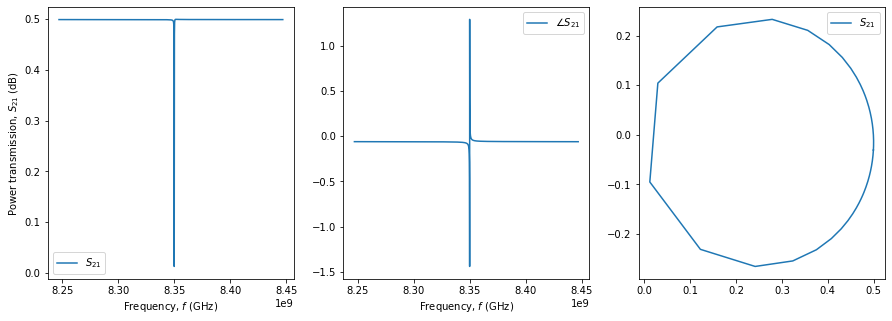

In [40]:
Resonators[0].plot_S21()

In [41]:
fitter=res.fit_S21()

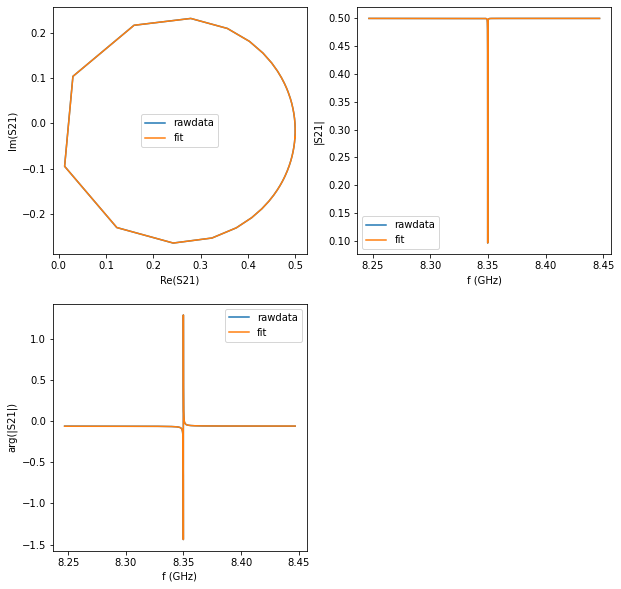

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
fitter.plotall()

In [43]:
fitter.fitresults

{'Qi_dia_corr': 243075205860.25137,
 'Qi_no_corr': 324562852293.27356,
 'absQc': 87345.53104605802,
 'Qc_dia_corr': 87345.53892619415,
 'Ql': 87345.50753985673,
 'fr': 8349874626.6699705,
 'theta0': -3.141167930407307,
 'phi0': 0.0004247774919163716,
 'phi0_err': 0.02642655183422184,
 'Ql_err': 55243.37968913675,
 'absQc_err': 44.90265473554724,
 'fr_err': 1261.3698213852558,
 'chi_square': 6.841299201388535e-07,
 'Qi_no_corr_err': 7.631203033108196e+17,
 'Qi_dia_corr_err': 4.2802809141776154e+17}

In [44]:
(fitter.fitresults['fr']/1e9,fitter.fitresults['fr_err']/1e9)

(8.34987462666997, 1.2613698213852558e-06)

In [45]:
(fitter.fitresults['Ql'],fitter.fitresults['Ql_err'])

(87345.50753985673, 55243.37968913675)